# MNIST convolutional neural networks with slim

* MNIST data를 가지고 softmax classifier를 만들어보자.
* [`tf.contrib.slim`](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/slim) 참고

### Import modules

In [1]:
"""A LeNet-5 like cnn MNIST classifier.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import time
import numpy as np

import tensorflow as tf

slim = tf.contrib.slim

sess_config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))

np.random.seed(219)
tf.set_random_seed(219)

C:\Users\home\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Import data

In [2]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.mnist.load_data()

train_data = train_data / 255.
train_labels = np.asarray(train_labels, dtype=np.int32)

test_data = test_data / 255.
test_labels = np.asarray(test_labels, dtype=np.int32)

### Show the MNIST

label = 3


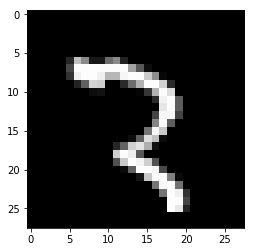

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = 500
print("label = {}".format(train_labels[index]))
plt.imshow(train_data[index].reshape(28, 28), cmap='gray')
plt.show()

### Set up dataset with `tf.data`

#### create input pipeline with `tf.data.Dataset`

In [4]:
batch_size = 32

# for train
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(buffer_size = 10000)
train_dataset = train_dataset.batch(batch_size = batch_size)
print(train_dataset)

# for test
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.shuffle(buffer_size = 10000)
test_dataset = test_dataset.batch(batch_size = len(test_data))
print(test_dataset)

<BatchDataset shapes: ((?, 28, 28), (?,)), types: (tf.float64, tf.int32)>
<BatchDataset shapes: ((?, 28, 28), (?,)), types: (tf.float64, tf.int32)>


#### Define Iterator

In [5]:
# tf.data.Iterator.from_string_handle의 output_shapes는 default = None이지만 꼭 값을 넣는 게 좋음
handle = tf.placeholder(tf.string, shape=[])
iterator = tf.data.Iterator.from_string_handle(handle,
                                               train_dataset.output_types,
                                               train_dataset.output_shapes)
x, y = iterator.get_next()
x = tf.cast(x, dtype = tf.float32)
y = tf.cast(y, dtype = tf.int32)

## `tf.contrib.slim`

```python
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# pylint: disable=unused-import,line-too-long,g-importing-member,wildcard-import
# TODO(jart): Delete non-slim imports
from tensorflow.contrib import losses
from tensorflow.contrib import metrics
from tensorflow.contrib.framework.python.ops.arg_scope import *
from tensorflow.contrib.framework.python.ops.variables import *
from tensorflow.contrib.layers.python.layers import *
from tensorflow.contrib.layers.python.layers.initializers import *
from tensorflow.contrib.layers.python.layers.regularizers import *
from tensorflow.contrib.slim.python.slim import evaluation
from tensorflow.contrib.slim.python.slim import learning
from tensorflow.contrib.slim.python.slim import model_analyzer
from tensorflow.contrib.slim.python.slim import queues
from tensorflow.contrib.slim.python.slim import summaries
from tensorflow.contrib.slim.python.slim.data import data_decoder
from tensorflow.contrib.slim.python.slim.data import data_provider
from tensorflow.contrib.slim.python.slim.data import dataset
from tensorflow.contrib.slim.python.slim.data import dataset_data_provider
from tensorflow.contrib.slim.python.slim.data import parallel_reader
from tensorflow.contrib.slim.python.slim.data import prefetch_queue
from tensorflow.contrib.slim.python.slim.data import tfexample_decoder
from tensorflow.python.util.all_util import make_all
# pylint: enable=unused-import,line-too-long,g-importing-member,wildcard-import

__all__ = make_all(__name__)
```

### Difference between [`tf.layers`](https://www.tensorflow.org/api_docs/python/tf/layers) and [`tf.contrib.layers`](https://www.tensorflow.org/api_docs/python/tf/contrib/layers)

#### [`tf.layers.conv2d()`](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d)
```python
tf.layers.conv2d(
    inputs,
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format='channels_last',
    dilation_rate=(1, 1),
    activation=None,
    use_bias=True,
    kernel_initializer=None,
    bias_initializer=tf.zeros_initializer(),
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    trainable=True,
    name=None,
    reuse=None
)
```

#### [`slim.conv2d()`](https://www.tensorflow.org/api_docs/python/tf/contrib/layers/conv2d)
```python
tf.contrib.layers.conv2d(
    inputs,
    num_outputs,
    kernel_size,
    stride=1,
    padding='SAME',
    data_format=None,
    rate=1,
    activation_fn=tf.nn.relu,
    normalizer_fn=None,
    normalizer_params=None,
    weights_initializer=initializers.xavier_initializer(),
    weights_regularizer=None,
    biases_initializer=tf.zeros_initializer(),
    biases_regularizer=None,
    reuse=None,
    variables_collections=None,
    outputs_collections=None,
    trainable=True,
    scope=None
)
```

### Create the model

In [8]:
def cnn_model_fn(x):
    
    with tf.name_scope('reshape'):
        x_image = tf.reshape(x, shape=[-1, 28, 28, 1])
        
        conv = slim.conv2d(x_image, 16, [3,3], scope='init_conv')
        #output : [batch_size, 28, 28, 16]
        
        with tf.variable_scope("first_box", num_outputs = 16, kernel_size = [3,3]):
            conv1 = slim.conv2d(conv, "conv1")
            conv2 = slim.conv2d(con1, "conv2")
            conv3 = slim.conv2d(con2, "conv3")
            conv4 = slim.conv2d(con3, "conv4")
            
        pool1 = slim.conv2d(conv4, kernel_size=[2,2], scope='pool1')
        #output : [batch_size, 14,14, 16]
        
        with tf.variable_scope("second_box", num_outputs = 32, kernel_size = [3,3]):
            conv1 = slim.conv2d(conv4, "conv1")
            conv2 = slim.conv2d(con1, "conv2")
            conv3 = slim.conv2d(con2, "conv3")
            conv4 = slim.conv2d(con3, "conv4")
            
        pool2 = slim.conv2d(conv4, kernel_size=[2,2], scope='pool1')
        #output : [batch_size, 7,7, 16]
        
        with tf.variable_scope("third_box", num_outputs = 64, kernel_size = [3,3]):
            conv1 = slim.conv2d(conv4, "conv1")
            conv2 = slim.conv2d(con1, "conv2")
            conv3 = slim.conv2d(con2, "conv3")
            conv4 = slim.conv2d(con3, "conv4")
            
        fc1 = slim.fully_connected(conv4, 1024, scope='fc1')
        
        is_training = tf.placeholder(tf.bool, shape=[])
        fc_drop = slim.dropout(fc1, keep_prob=0.7, scope='dropout')
        
        logits = slim.fully_connected(fc1_drop, 10, activation_fn=None, scope='logits')
        
        return logits, is_training, x_image

### Build the model

In [9]:
logits, is_training, x_image = cnn_model_fn(x)

TypeError: __init__() got an unexpected keyword argument 'num_outputs'

### Define loss and optimizer

In [8]:
# 여기를 직접 채워 넣으시면 됩니다.
#y_one_hot = tf.one_hot(y, depth=10)
#cross_entropy = tf.losses.softmax_cross_entropy(onehot_labels=y_one_hot, logits=logits)
cross_entropy = tf.losses.sparse_softmax_cross_entropy(labels=y,
                                                       logits=logits)

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

NameError: name 'logits' is not defined

### Assign `tf.summary.FileWriter`

In [ ]:
graph_location = 'graphs/02_mnist_cnn_with_slim'
print('Saving graph to: %s' % graph_location)
train_writer = tf.summary.FileWriter(graph_location)
train_writer.add_graph(tf.get_default_graph()) 

### `tf.summary`

In [ ]:
with tf.name_scope('summaries'):
  tf.summary.scalar('loss/cross_entropy', cross_entropy)
  tf.summary.image('images', x_image)
  for var in tf.trainable_variables():
    tf.summary.histogram(var.op.name, var)
  # merge all summaries
  summary_op = tf.summary.merge_all()

### `tf.Session()` and train

In [ ]:
sess = tf.Session(config=sess_config)
sess.run(tf.global_variables_initializer())

# train_iterator
train_iterator = train_dataset.make_initializable_iterator()
train_handle = sess.run(train_iterator.string_handle())

# Train
max_epochs = 2
step = 0
for epochs in range(max_epochs):
  # 여기를 직접 채워 넣으시면 됩니다.
  sess.run(train_iterator.initializer)

  start_time = time.time()
  while True:
    try:
      # 여기를 직접 채워 넣으시면 됩니다.
      _, loss = sess.run([train_step, cross_entropy],
                         feed_dict={handle: train_handle,
                                    is_training: True})
      if step % 100 == 0:
        print("step: {}, loss: {}".format(step, loss))
        
        # summary
        summary_str = sess.run(summary_op, feed_dict={handle: train_handle, is_training: False})
        train_writer.add_summary(summary_str, global_step=step)
        
      step += 1

    except tf.errors.OutOfRangeError:
      print("End of dataset")  # ==> "End of dataset"
      break
    
  print("Epochs: {} Elapsed time: {}".format(epochs, time.time() - start_time))

train_writer.close()
print("training done!")

### Test trained model

In [ ]:
# test_iterator
test_iterator = test_dataset.make_initializable_iterator()
test_handle = sess.run(test_iterator.string_handle())
sess.run(test_iterator.initializer)

In [ ]:
accuracy, acc_op = tf.metrics.accuracy(labels=y, predictions=tf.argmax(logits, 1), name='accuracy')
sess.run(tf.local_variables_initializer())

sess.run(acc_op, feed_dict={handle: test_handle, is_training: False})
print("test accuracy:", sess.run(accuracy, feed_dict={handle: test_handle, is_training: False}))

### Print results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

test_batch_size = 16
batch_index = np.random.choice(len(test_data), size=test_batch_size, replace=False)
batch_xs = test_data[batch_index]
y_pred = sess.run(logits, feed_dict={x: batch_xs, is_training: False})

fig = plt.figure(figsize=(16, 10))
for i, (px, py) in enumerate(zip(batch_xs, y_pred)):
  p = fig.add_subplot(4, 8, i+1)
  p.set_title("y_pred: {}".format(np.argmax(py)))
  p.imshow(px.reshape(28, 28), cmap='gray')
  p.axis('off')